In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn import metrics
from sklearn.metrics import r2_score
import seaborn as sns

In [ ]:
df=pd.read_csv("train-chennai-sale.csv")
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250


In [ ]:
 df.describe()
 df.shape
 df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
df.isnull().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

**FILLING NULL VALUES**

In [ ]:
df['N_BEDROOM']=df['N_BEDROOM'].fillna(df['N_BEDROOM'].median())
df['N_BATHROOM']=df['N_BATHROOM'].fillna(df['N_BATHROOM'].median())
df['QS_OVERALL']=df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())



In [ ]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
df.isnull().sum()

PRT_ID           0
AREA             0
INT_SQFT         0
DATE_SALE        0
DIST_MAINROAD    0
N_BEDROOM        0
N_BATHROOM       0
N_ROOM           0
SALE_COND        0
PARK_FACIL       0
DATE_BUILD       0
BUILDTYPE        0
UTILITY_AVAIL    0
STREET           0
MZZONE           0
QS_ROOMS         0
QS_BATHROOM      0
QS_BEDROOM       0
QS_OVERALL       0
REG_FEE          0
COMMIS           0
SALES_PRICE      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7109 non-null   float64
 6   N_BATHROOM     7109 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

**CHECKING FOR UNIQUE VALUES**

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
df['AREA']=df['AREA'].replace({'Ann Nagar':'Anna Nagar','Karapakam':'Karapakkam','Velchery':'Velachery','Adyr':'Adyar','Chrmpet':'Chrompet','Chormpet':'Chrompet','Chrompt':'Chrompet','KKNagar':'KK Nagar','TNagar':'T Nagar','Ana Nagar':'Anna Nagar'})

In [ ]:
df['AREA'].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df['SALE_COND'].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
df['SALE_COND']=df['SALE_COND'].replace({'AbNormal':'Ab Normal','PartiaLl':'Partial','Partiall':'Partial','AdjLand':'Adj Land'})

In [ ]:
df['SALE_COND'].unique()

array(['Ab Normal', 'Family', 'Partial', 'Adj Land', 'Normal Sale'],
      dtype=object)

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
df['PARK_FACIL']=df['PARK_FACIL'].replace({'Noo':'No'})

In [ ]:
df['PARK_FACIL'].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
df['BUILDTYPE']=df['BUILDTYPE'].replace({'Comercial':'Commercial','Other':'Others'})

In [ ]:
df['BUILDTYPE'].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].replace({'AllPub':'All Pub','NoSeWa':'NoSewr '})
space=lambda x:x.strip()
df['UTILITY_AVAIL']=df['UTILITY_AVAIL'].apply(space)

In [ ]:
df['UTILITY_AVAIL'].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
df['STREET']=df['STREET'].replace({'Pavd':'Paved','NoAccess':'No Access'})

In [ ]:
df['STREET'].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
df['MZZONE'].unique()

array(['A', 'RH', 'RL', 'I', 'C', 'RM'], dtype=object)

**EDA ON DATA**

Text(0.5, 1.0, 'AREA OF VARIUOS PLACES')

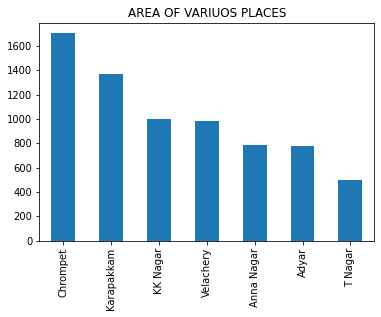

In [ ]:
df['AREA'].value_counts().plot(kind='bar')
plt.title('AREA OF VARIUOS PLACES')

Text(0.5, 1.0, 'SALE CONDITION')

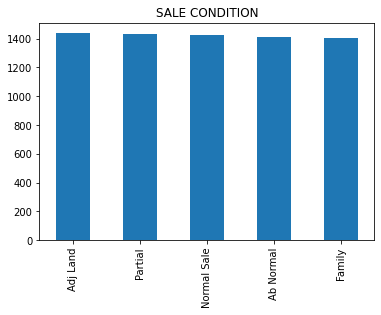

In [ ]:
df['SALE_COND'].value_counts().plot(kind='bar')
plt.title('SALE CONDITION')

In [ ]:
df.columns

Index(['PRT_ID', 'AREA', 'INT_SQFT', 'DATE_SALE', 'DIST_MAINROAD', 'N_BEDROOM',
       'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL', 'DATE_BUILD',
       'BUILDTYPE', 'UTILITY_AVAIL', 'STREET', 'MZZONE', 'QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL', 'REG_FEE', 'COMMIS',
       'SALES_PRICE'],
      dtype='object')

Text(0.5, 1.0, 'PARKING FACILITY')

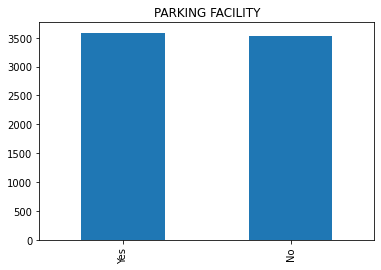

In [ ]:
df['PARK_FACIL'].value_counts().plot(kind='bar')
plt.title('PARKING FACILITY')

Text(0.5, 1.0, 'UTILITY AVAILABILITY ')

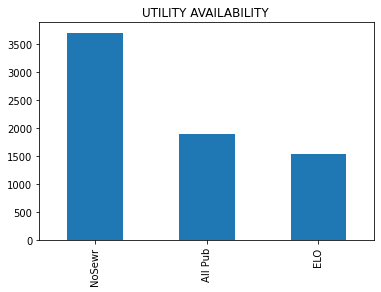

In [ ]:
df['UTILITY_AVAIL'].value_counts().plot(kind='bar')
plt.title('UTILITY AVAILABILITY ')

Text(0.5, 1.0, 'STREET COUNTS')

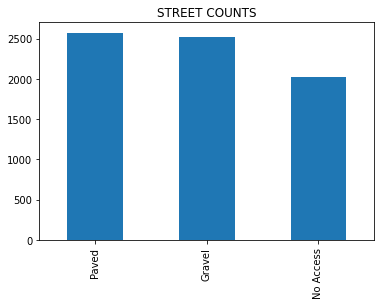

In [ ]:
df['STREET'].value_counts().plot(kind='bar')
plt.title('STREET COUNTS')

Text(0.5, 1.0, 'MZZONE COUNTS')

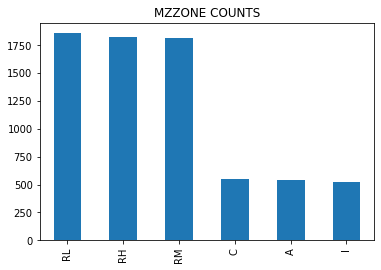

In [ ]:
df['MZZONE'].value_counts().plot(kind='bar')
plt.title('MZZONE COUNTS')

Text(0.5, 1.0, 'BUILDTYPE COUNTS')

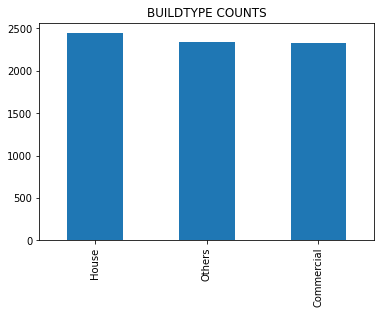

In [ ]:
df['BUILDTYPE'].value_counts().plot(kind='bar')
plt.title('BUILDTYPE COUNTS')

In [ ]:
A=df['AREA'].groupby(df['AREA']).count()
B=df['AREA'].groupby(df['BUILDTYPE']).count()
C=df['AREA'].groupby(df['UTILITY_AVAIL']).count()
D=df['AREA'].groupby(df['STREET']).count()
E=df['AREA'].groupby(df['MZZONE']).count()
F=df['AREA'].groupby(df['PARK_FACIL']).count()

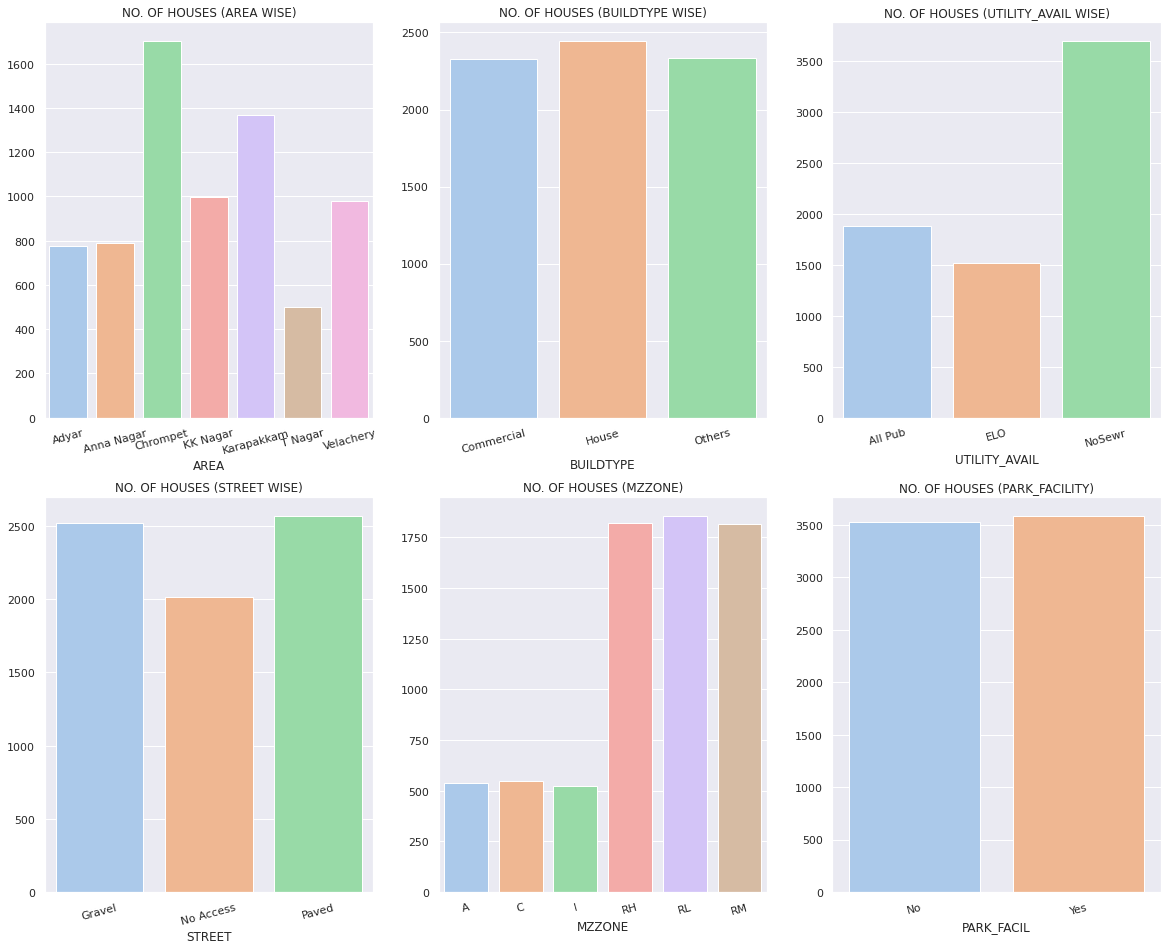

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x=A.index,y=A.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (AREA WISE)')
plt.subplot(232)
sns.barplot(x=B.index,y=B.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x=C.index,y=C.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x=D.index,y=D.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (STREET WISE)')
plt.subplot(235)
sns.barplot(x=E.index,y=E.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (MZZONE)')
plt.subplot(236)
sns.barplot(x=F.index,y=F.values,data=df)
plt.xticks(rotation=15)
plt.title('NO. OF HOUSES (PARK_FACILITY)')
plt.show()

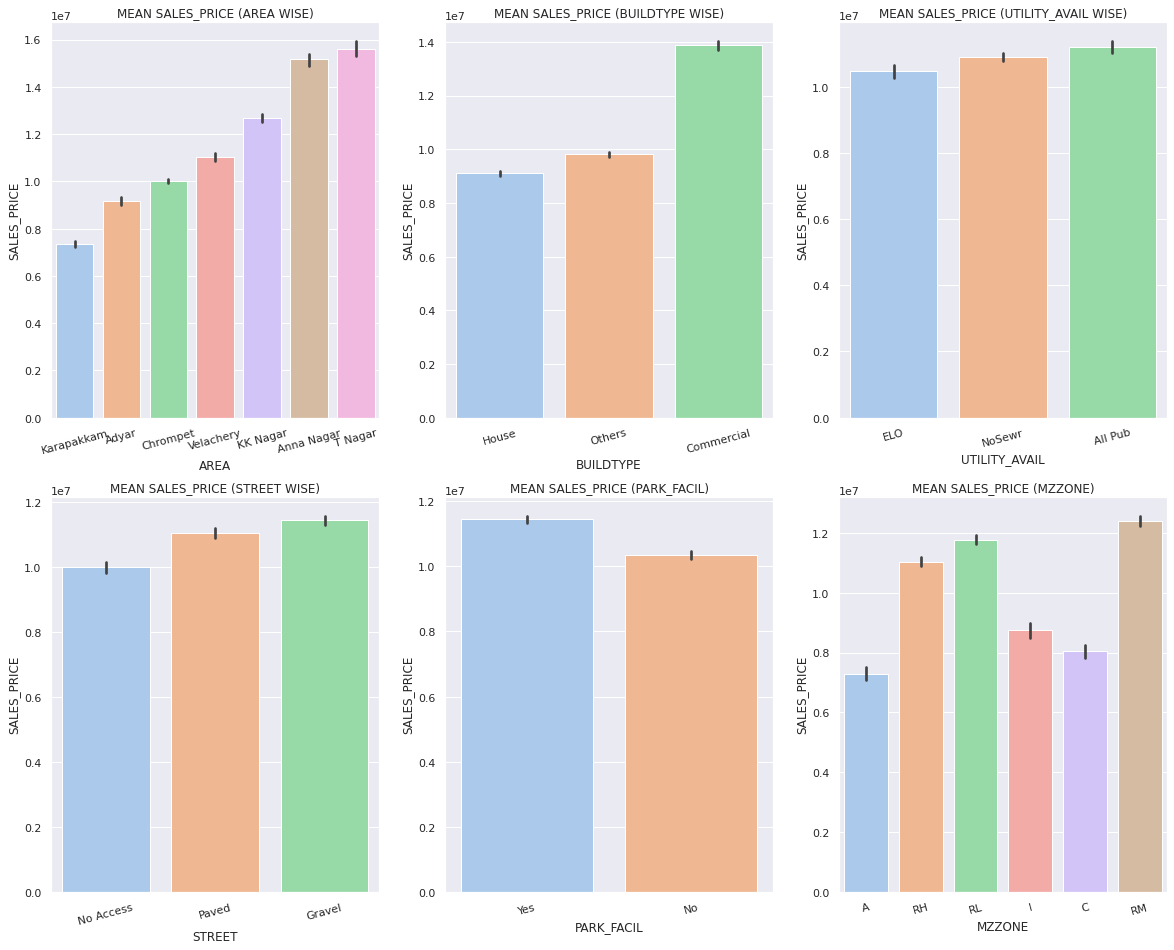

In [ ]:
sns.set_theme(style="darkgrid",palette="pastel")
plt.figure(figsize=(20,16))
plt.subplot(231)
sns.barplot(x='AREA',y='SALES_PRICE',data=df,order=df.groupby('AREA')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['AREA'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (AREA WISE)')
plt.subplot(232)
sns.barplot(x='BUILDTYPE',y='SALES_PRICE',data=df,order=df.groupby('BUILDTYPE')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['BUILDTYPE'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (BUILDTYPE WISE)')
plt.subplot(233)
sns.barplot(x='UTILITY_AVAIL',y='SALES_PRICE',data=df,order=df.groupby('UTILITY_AVAIL')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['UTILITY_AVAIL'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (UTILITY_AVAIL WISE)')
plt.subplot(234)
sns.barplot(x='STREET',y='SALES_PRICE',data=df,order=df.groupby('STREET')['SALES_PRICE'].mean().reset_index().sort_values('SALES_PRICE')['STREET'])
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (STREET WISE)')
plt.subplot(235)
sns.barplot(x='PARK_FACIL',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (PARK_FACIL)')
plt.subplot(236)
sns.barplot(x='MZZONE',y='SALES_PRICE',data=df)
plt.xticks(rotation=15)
plt.title('MEAN SALES_PRICE (MZZONE)')
plt.show()

**ENCODING**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
label=LabelEncoder()
df['BUILDTYPE']=label.fit_transform(df['BUILDTYPE'])
df['AREA']=label.fit_transform(df['AREA'])
df['PARK_FACIL']=label.fit_transform(df['PARK_FACIL'])
df['MZZONE']=label.fit_transform(df['MZZONE'])
df['SALE_COND']=label.fit_transform(df['SALE_COND'])
df['UTILITY_AVAIL']=label.fit_transform(df['UTILITY_AVAIL'])
df['STREET']=label.fit_transform(df['STREET'])


In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,4,1004,04-05-2011,131,1.0,1.0,3,0,1,...,0,2,0,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,1,1986,19-12-2006,26,2.0,1.0,5,0,0,...,0,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,0,909,04-02-2012,70,1.0,1.0,3,0,1,...,1,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,6,1855,13-03-2010,14,3.0,2.0,5,2,0,...,2,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,4,1226,05-10-2009,84,1.0,1.0,3,0,1,...,0,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250


We need to find the age of house which can be found with the difference of date build and date saled.

In [ ]:
df['Age']=pd.to_datetime(df['DATE_SALE'],format='%d-%m-%Y')-pd.to_datetime(df['DATE_BUILD'],format='%d-%m-%Y')
for i in df.index:
  df.loc[i,'Age']=df.loc[i,'Age'].days


In [ ]:
df.head()

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,Age
0,P03210,4,1004,04-05-2011,131,1.0,1.0,3,0,1,...,2,0,4.0,3.9,4.9,4.330,380000,144400,7600000,16060
1,P09411,1,1986,19-12-2006,26,2.0,1.0,5,0,0,...,0,3,4.9,4.2,2.5,3.765,760122,304049,21717770,4015
2,P01812,0,909,04-02-2012,70,1.0,1.0,3,0,1,...,0,4,4.1,3.8,2.2,3.090,421094,92114,13159200,7300
3,P05346,6,1855,13-03-2010,14,3.0,2.0,5,2,0,...,2,2,4.7,3.9,3.6,4.010,356321,77042,9630290,8030
4,P06210,4,1226,05-10-2009,84,1.0,1.0,3,0,1,...,0,1,3.0,2.5,4.1,3.290,237000,74063,7406250,10950


The column 'PRTID' can be removed, since it is just the individual id's of houses. And we can drop the 'REG_FEE' and 'COMMIS' as it can be found only when sale is made. Also we can drop the 'DATE_SALE' and 'DATE_BUILD' as we have already taken 'AGES'. Since it is mentioned in the decription QS featured are masked data, the columns 'QS_ROOMS',
'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL' can be dropped.

In [ ]:
df=df.drop(['PRT_ID','REG_FEE','COMMIS','DATE_SALE','DATE_BUILD','QS_ROOMS',
       'QS_BATHROOM', 'QS_BEDROOM', 'QS_OVERALL'],axis=1)
df

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,SALES_PRICE,Age
0,4,1004,131,1.0,1.0,3,0,1,0,0,2,0,7600000,16060
1,1,1986,26,2.0,1.0,5,0,0,0,0,0,3,21717770,4015
2,0,909,70,1.0,1.0,3,0,1,0,1,0,4,13159200,7300
3,6,1855,14,3.0,2.0,5,2,0,2,2,2,2,9630290,8030
4,4,1226,84,1.0,1.0,3,0,1,2,0,0,1,7406250,10950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,4,598,51,1.0,1.0,2,1,0,2,1,1,5,5353000,17885
7105,6,1897,52,3.0,2.0,5,2,1,2,2,1,3,10818480,3285
7106,6,1614,152,2.0,1.0,4,3,0,1,2,0,2,8351410,10220
7107,4,787,40,1.0,1.0,2,4,1,0,1,2,4,8507000,11680


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   int64  
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   int64  
 11  MZZONE         7109 non-null   int64  
 12  SALES_PRICE    7109 non-null   int64  
 13  Age            7109 non-null   object 
dtypes: float64(2), int64(11), object(1)
memory usage: 777.7+ KB


the age is in object type, convert it into int64.

In [ ]:
df['Age']=df['Age'].apply(pd.to_numeric)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           7109 non-null   int64  
 1   INT_SQFT       7109 non-null   int64  
 2   DIST_MAINROAD  7109 non-null   int64  
 3   N_BEDROOM      7109 non-null   float64
 4   N_BATHROOM     7109 non-null   float64
 5   N_ROOM         7109 non-null   int64  
 6   SALE_COND      7109 non-null   int64  
 7   PARK_FACIL     7109 non-null   int64  
 8   BUILDTYPE      7109 non-null   int64  
 9   UTILITY_AVAIL  7109 non-null   int64  
 10  STREET         7109 non-null   int64  
 11  MZZONE         7109 non-null   int64  
 12  SALES_PRICE    7109 non-null   int64  
 13  Age            7109 non-null   int64  
dtypes: float64(2), int64(12)
memory usage: 777.7 KB


Text(0.5, 1.0, 'CORRELATION')

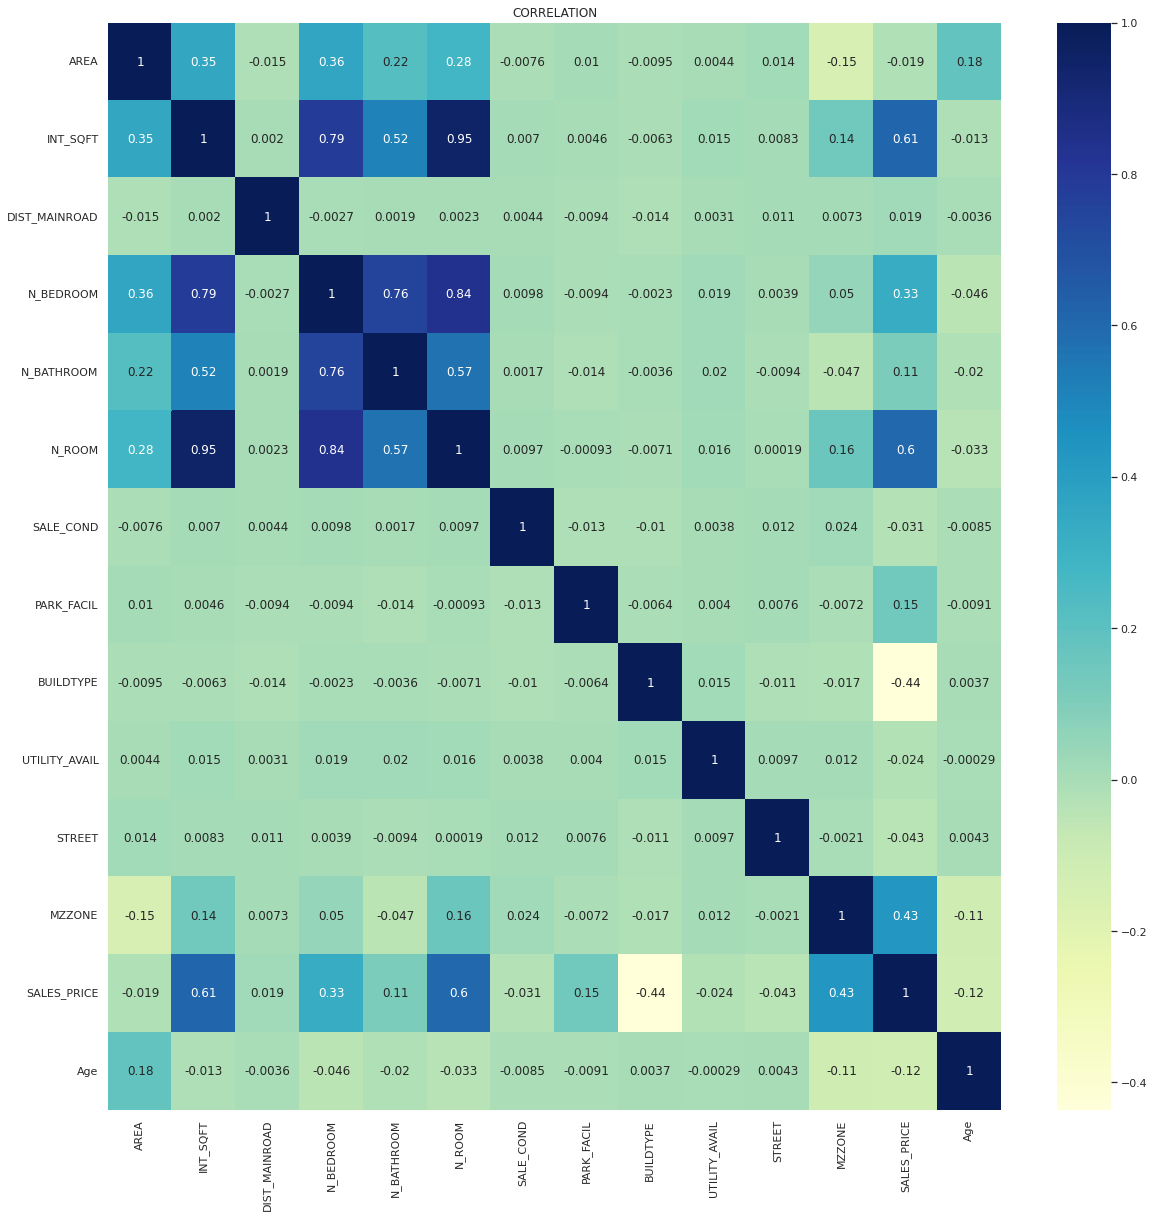

In [ ]:

plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.title('CORRELATION')

From the correlation it is evident that Sales price is more dependent on Number of rooms and  on  interior square feet  which has a correlation of 0.6 and 0.61

Text(0.5, 1.0, 'SALES_PRICE VS INT_SQUARE_FEET')

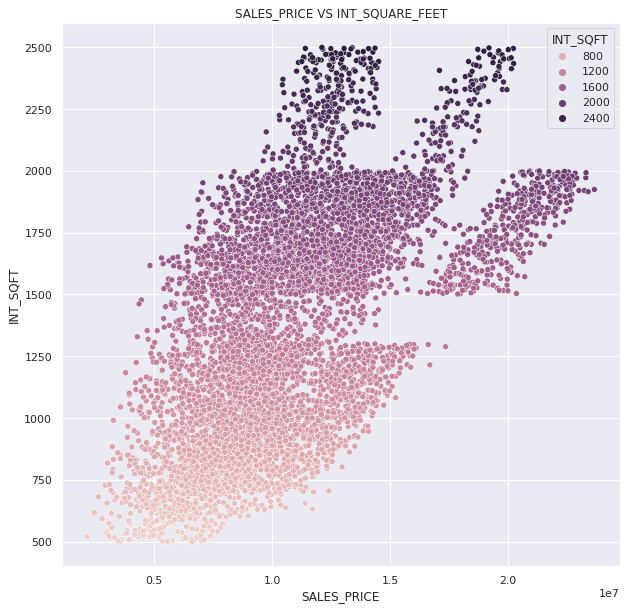

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SALES_PRICE',y='INT_SQFT',data=df,hue='INT_SQFT')
plt.title('SALES_PRICE VS INT_SQUARE_FEET')

Text(0.5, 1.0, 'SALES_PRICE VS NUMBER OF ROOMS')

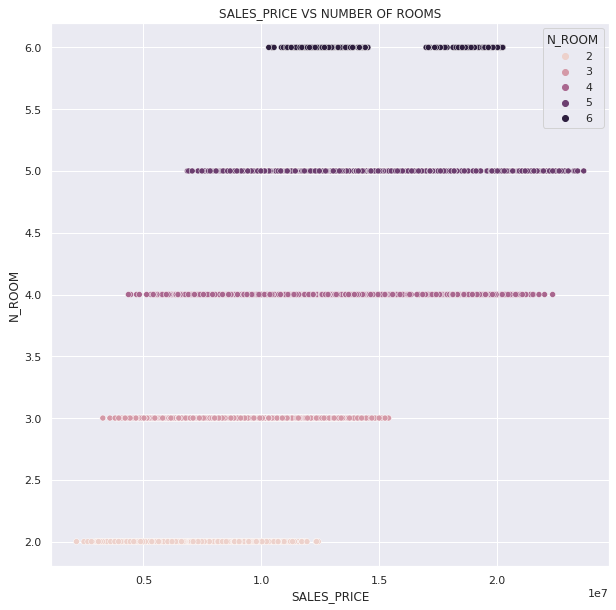

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='SALES_PRICE',y='N_ROOM',data=df,hue='N_ROOM')
plt.title('SALES_PRICE VS NUMBER OF ROOMS')

Splitting the data

In [ ]:
x=df.drop(['SALES_PRICE'],axis=1)
y=df['SALES_PRICE']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


Scaling

In [ ]:
scale=StandardScaler()
normal_x_train=pd.DataFrame(scale.fit_transform(x_train),columns=x_train.columns)
normal_x_train

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Age
0,0.020151,1.182792,1.282981,1.668742,1.905547,1.272850,-0.713553,0.991072,1.231675,0.871806,-1.183362,1.132521,-1.490552
1,1.649517,1.034627,0.728315,1.668742,1.905547,1.272850,0.699392,0.991072,0.002162,-0.305298,1.182530,-0.203574,1.922617
2,0.563273,-0.189915,1.300314,-0.797830,-0.524784,-0.675393,-0.713553,-1.009008,-1.227351,0.871806,-1.183362,-0.871622,1.516288
3,-1.609215,-0.196452,-1.282347,0.435456,1.905547,0.298728,1.405864,0.991072,0.002162,0.871806,-1.183362,-0.203574,-0.352829
4,-0.522971,-0.904594,1.317648,-0.797830,-0.524784,-0.675393,-0.007081,-1.009008,1.231675,0.871806,1.182530,1.132521,1.191224
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5682,1.649517,0.740475,-0.918348,0.435456,-0.524784,0.298728,-1.420026,0.991072,-1.227351,0.871806,1.182530,0.464473,-0.027765
5683,1.106395,1.076026,0.138983,0.435456,-0.524784,1.272850,0.699392,0.991072,0.002162,0.871806,-0.000416,0.464473,-0.515361
5684,1.649517,0.435429,-1.542347,0.435456,-0.524784,0.298728,-0.713553,-1.009008,0.002162,0.871806,-0.000416,0.464473,2.003883
5685,-1.066093,0.925682,1.334981,0.435456,-0.524784,1.272850,-0.007081,-1.009008,-1.227351,-1.482401,-0.000416,0.464473,0.134767


In [ ]:
normal_x_test=pd.DataFrame(scale.fit_transform(x_test),columns=x_test.columns)
normal_x_test.head()

,AREA,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,BUILDTYPE,UTILITY_AVAIL,STREET,MZZONE,Age
0,-1.615217,-0.682379,-1.140682,-0.776766,-0.502855,-0.678264,0.014425,-1.009894,-0.015004,-1.461623,-1.218521,0.420086,-1.529632
1,-0.518351,-1.405290,-1.443254,-0.776766,-0.502855,-1.690323,-1.400185,0.990203,-0.015004,0.900227,-1.218521,-0.244388,0.793804
2,-1.066784,0.734614,0.728142,-0.776766,-0.502855,0.333794,-1.400185,-1.009894,-0.015004,-1.461623,-0.041390,-0.244388,-0.568210
3,-0.518351,-1.187973,-1.194077,-0.776766,-0.502855,-0.678264,-1.400185,-1.009894,1.240028,0.900227,-1.218521,0.420086,0.072738
4,-0.518351,-0.908566,-0.820312,-0.776766,-0.502855,-0.678264,0.014425,0.990203,1.240028,0.900227,1.135741,0.420086,1.274515



**MODEL TRAINING**
         

        Now with the preprocessed data we need to build models and want to know which ML model gives best R^2 value. Here we have used the standard scaler data.

In [ ]:
d={}
def metrics_R2_score(actual,predicted,name):
  r2=r2_score(actual,predicted)
  d[name]=[r2]


In [ ]:
def ml_model(x_test=None,y_test=None,model=None,name=''):
  predicted=model.predict(x_test)
  actual=y_test
  metrics_R2_score(actual,predicted,name)
  plt.figure(figsize=(15,10))
  plt.scatter(actual,predicted)
  p1 = max(max(predicted), max(actual))
  p2 = min(min(predicted), min(actual))

  plt.plot([p1,p2],[p1,p2])
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.title(name)
  plt.axis('equal')
  plt.show()

**LINEAR REGRESSION**

In [ ]:
lr=LinearRegression()
lr.fit(normal_x_train,y_train)
y_predict_lr=lr.predict(normal_x_test)
print('R2-Score :',metrics.r2_score(y_test,y_predict_lr))

R2-Score : 0.7989583015181707


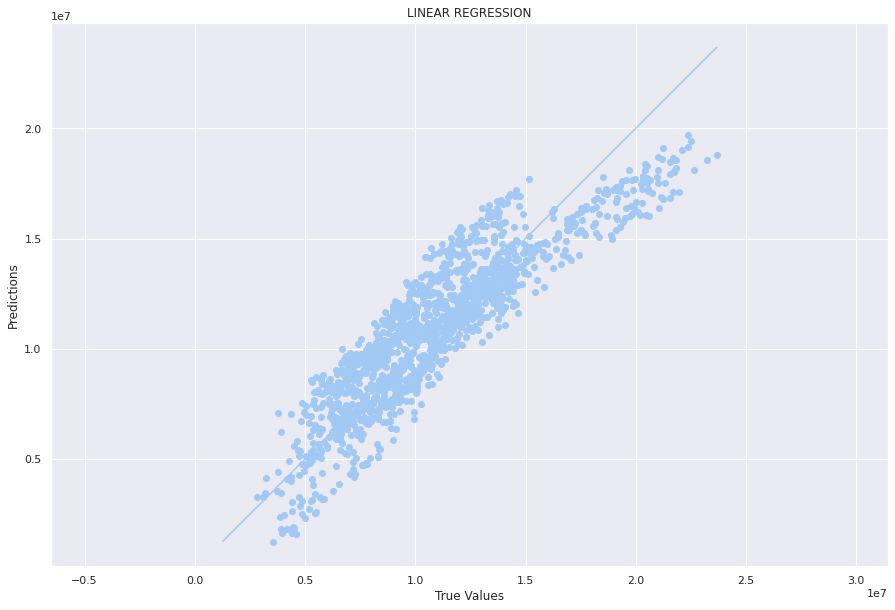

In [ ]:
ml_model(x_test=normal_x_test,y_test=y_test,model=lr,name='LINEAR REGRESSION')

**RANDOM FOREST REGRESSOR**

R2-Score : 0.9815167860585906


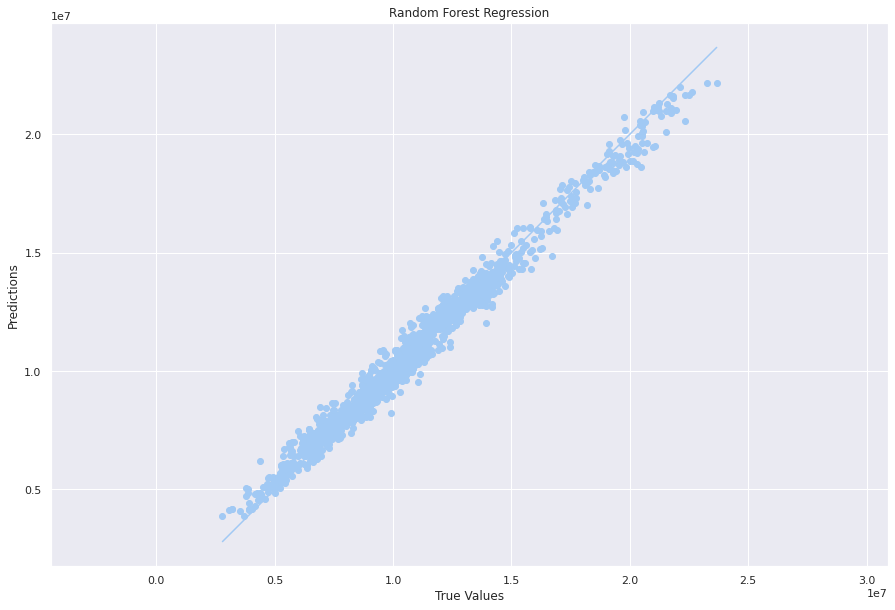

In [ ]:
rfg=RandomForestRegressor(n_estimators=100,max_depth=15,max_features='sqrt')
rfg.fit(normal_x_train,y_train)
y_predict_rfg=rfg.predict(normal_x_test)
print('R2-Score :',metrics.r2_score(y_test,y_predict_rfg))

ml_model(x_test=normal_x_test,y_test=y_test,model=rfg,name="Random Forest Regression")

**DECISION TREE REGRESSION**

R2-Score : 0.9655571725656049


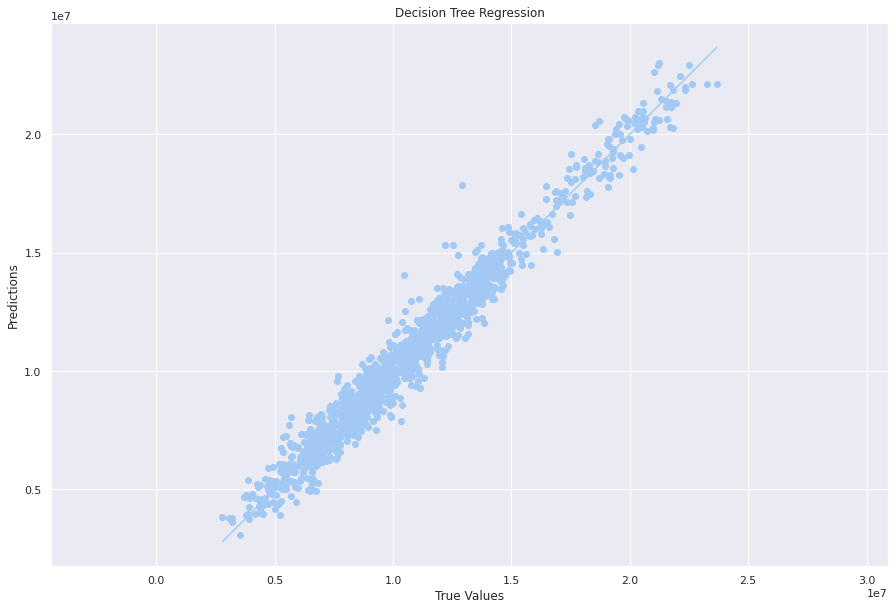

In [ ]:
dt=DecisionTreeRegressor()
dt.fit(normal_x_train,y_train)
y_predict_dt=dt.predict(normal_x_test)
print('R2-Score :',metrics.r2_score(y_test,y_predict_dt))

ml_model(x_test=normal_x_test,y_test=y_test,model=dt,name="Decision Tree Regression")


In [ ]:
final_result=pd.DataFrame(d,index=["R2"])
final_result

,Lr,Random Forest Regression,Decision Tree Regression
R2,0.798958,0.981517,0.965557


In [ ]:
final_result.loc['R2'].max()

0.9815167860585906

From the final result it is seen that Random Forest Regressor has the highest  R2 value of 0.98.


# **CONCLUSION:**
 For the above project we have done the cleaning of the data, removed the duplicates, done the data preprocessing, and found the correlation between various features which aids to the determination of the sales price in various areas, type of buildings which will give more sale price when sold etc.

It can be clearly seen that for a agent to build an building in chennai it is preferable to build a "commercial" type than other types and also it would be build in "T-Nagar" area , and also with all utilities and with parking facility. It is also evident that street way with gravel type is good choice. These are the best way that a agent can get more money/selling price which is evident from the data.